In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is 42A7-BDFB

 Directory of C:\Users\Narasimhulu E\Documents\Assingnments\Random Forests

05/08/2023  02:08 PM    <DIR>          .
04/26/2023  11:04 PM    <DIR>          ..
05/08/2023  01:36 PM    <DIR>          .ipynb_checkpoints
03/02/2023  07:47 PM            17,023 Company_Data (2).csv
03/02/2023  07:47 PM            21,837 Fraud_check (2).csv
03/02/2023  07:47 PM             1,378 problem statement(company data) (2).txt
03/02/2023  07:47 PM               133 Problem_statement(Fraudcheck) (3).txt
05/08/2023  01:42 PM         1,772,502 Random Forest (Fraud_check).ipynb
05/08/2023  02:08 PM            11,207 RANDOM FOREST(Company data.csv).ipynb
               6 File(s)      1,824,080 bytes
               3 Dir(s)  50,067,349,504 bytes free


In [3]:
compdt=pd.read_csv("Company_Data (2).csv")

In [4]:
compdt.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
compdt.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


# EDA

In [6]:
compdt.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
compdt.shape

(400, 11)

In [8]:
compdt.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

# DATA PROCESSING

In [9]:
compdt['ShelveLoc'].unique(),compdt['Urban'].unique(),compdt['US'].unique()

(array(['Bad', 'Good', 'Medium'], dtype=object),
 array(['Yes', 'No'], dtype=object),
 array(['Yes', 'No'], dtype=object))

In [10]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [11]:
compdt['ShelveLoc']=LE.fit_transform(compdt['ShelveLoc'])
compdt['Urban']=LE.fit_transform(compdt['Urban'])
compdt['US']=LE.fit_transform(compdt['US'])

In [12]:
compdt.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int32
Age              int64
Education        int64
Urban            int32
US               int32
dtype: object

In [13]:
compdt

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


# CONVERTING SALES INTO CATEGORICAL VARIABLE

In [14]:
compdt.insert(11,"SalesVariable",'')

In [15]:
compdt

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SalesVariable
0,9.50,138,73,11,276,120,0,42,17,1,1,
1,11.22,111,48,16,260,83,1,65,10,1,1,
2,10.06,113,35,10,269,80,2,59,12,1,1,
3,7.40,117,100,4,466,97,2,55,14,1,1,
4,4.15,141,64,3,340,128,0,38,13,1,0,
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,
396,6.14,139,23,3,37,120,2,55,11,0,1,
397,7.41,162,26,12,368,159,2,40,18,1,1,
398,5.94,100,79,7,284,95,0,50,12,1,1,


In [16]:
for i in range(0,len(compdt['Sales'])):
    if compdt['Sales'][i]>=11.0:
        compdt['SalesVariable'][i] ='High'
    elif compdt['Sales'][i]<=6.0:
        compdt['SalesVariable'][i] = 'Low'
    else:
        compdt['SalesVariable'][i] = 'Medium'

In [17]:
compdt

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SalesVariable
0,9.50,138,73,11,276,120,0,42,17,1,1,Medium
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,Medium
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,High
396,6.14,139,23,3,37,120,2,55,11,0,1,Medium
397,7.41,162,26,12,368,159,2,40,18,1,1,Medium
398,5.94,100,79,7,284,95,0,50,12,1,1,Low


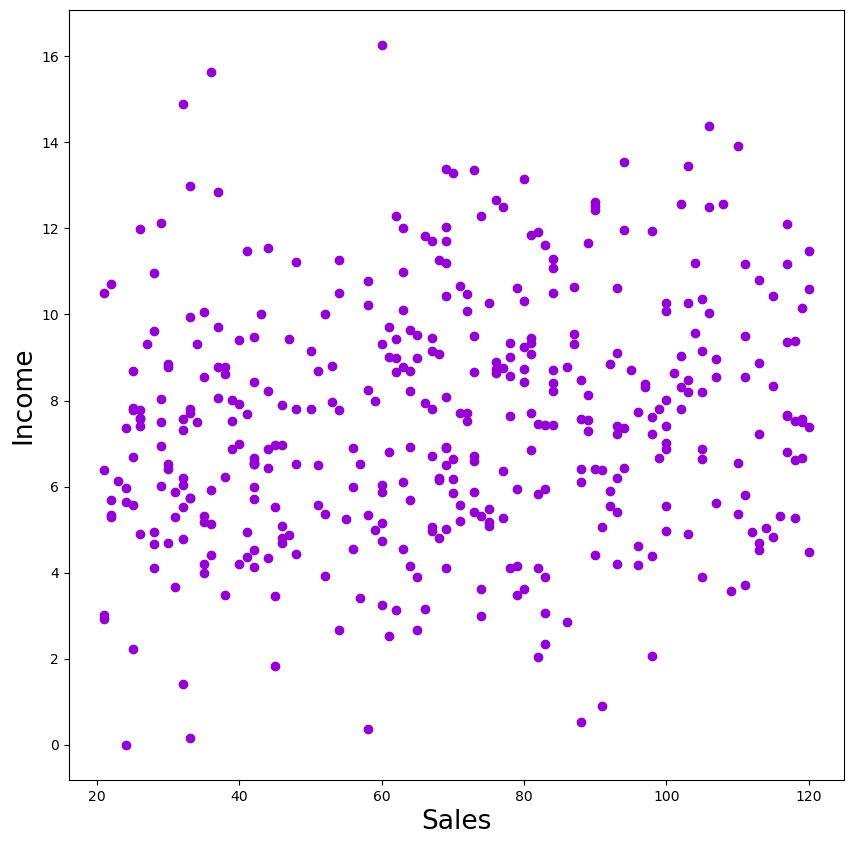

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(compdt['Income'],compdt['Sales'],color='darkviolet')
plt.ylabel("Income",size=19)
plt.xlabel("Sales",size=19)
plt.show()

# MODEL BUILDING

In [19]:
X=compdt.iloc[:,1:-1]
Y=compdt.iloc[:,-1]

In [20]:
X.head(4)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1


In [21]:
Y.head()

0    Medium
1      High
2    Medium
3    Medium
4       Low
Name: SalesVariable, dtype: object

# SPLIT INTO TRAINING AND TESTING DATA

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.25,random_state=7)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((300, 10), (100, 10), (300,), (100,))

In [23]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
382,121,28,19,315,121,2,66,14,1,1
84,111,25,0,52,121,0,43,18,0,0
115,139,35,0,95,129,2,42,13,1,0
328,117,66,1,65,111,0,55,11,1,1
99,121,47,3,220,107,0,56,16,0,1
...,...,...,...,...,...,...,...,...,...,...
211,117,118,14,445,120,2,32,15,1,1
67,126,61,14,152,115,2,47,16,1,1
25,139,32,0,176,82,1,54,11,0,0
196,130,28,6,410,133,0,72,16,1,1


In [24]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
265,130,35,10,402,129,0,39,17,1,1
65,122,26,0,197,128,2,55,13,0,0
120,128,105,11,249,131,2,63,13,1,1
132,125,87,9,232,136,1,72,10,1,1
378,133,88,3,105,119,2,79,12,1,1
...,...,...,...,...,...,...,...,...,...,...
288,116,40,0,74,97,2,76,15,0,0
66,127,92,0,508,91,2,56,18,1,0
303,133,52,16,290,99,2,43,11,1,1
165,147,58,7,100,191,0,27,15,1,1


In [25]:
y_train

382       Low
84        Low
115    Medium
328       Low
99        Low
        ...  
211    Medium
67     Medium
25       High
196       Low
175    Medium
Name: SalesVariable, Length: 300, dtype: object

In [26]:
y_test

265       Low
65        Low
120    Medium
132    Medium
378    Medium
        ...  
288    Medium
66     Medium
303    Medium
165       Low
101    Medium
Name: SalesVariable, Length: 100, dtype: object

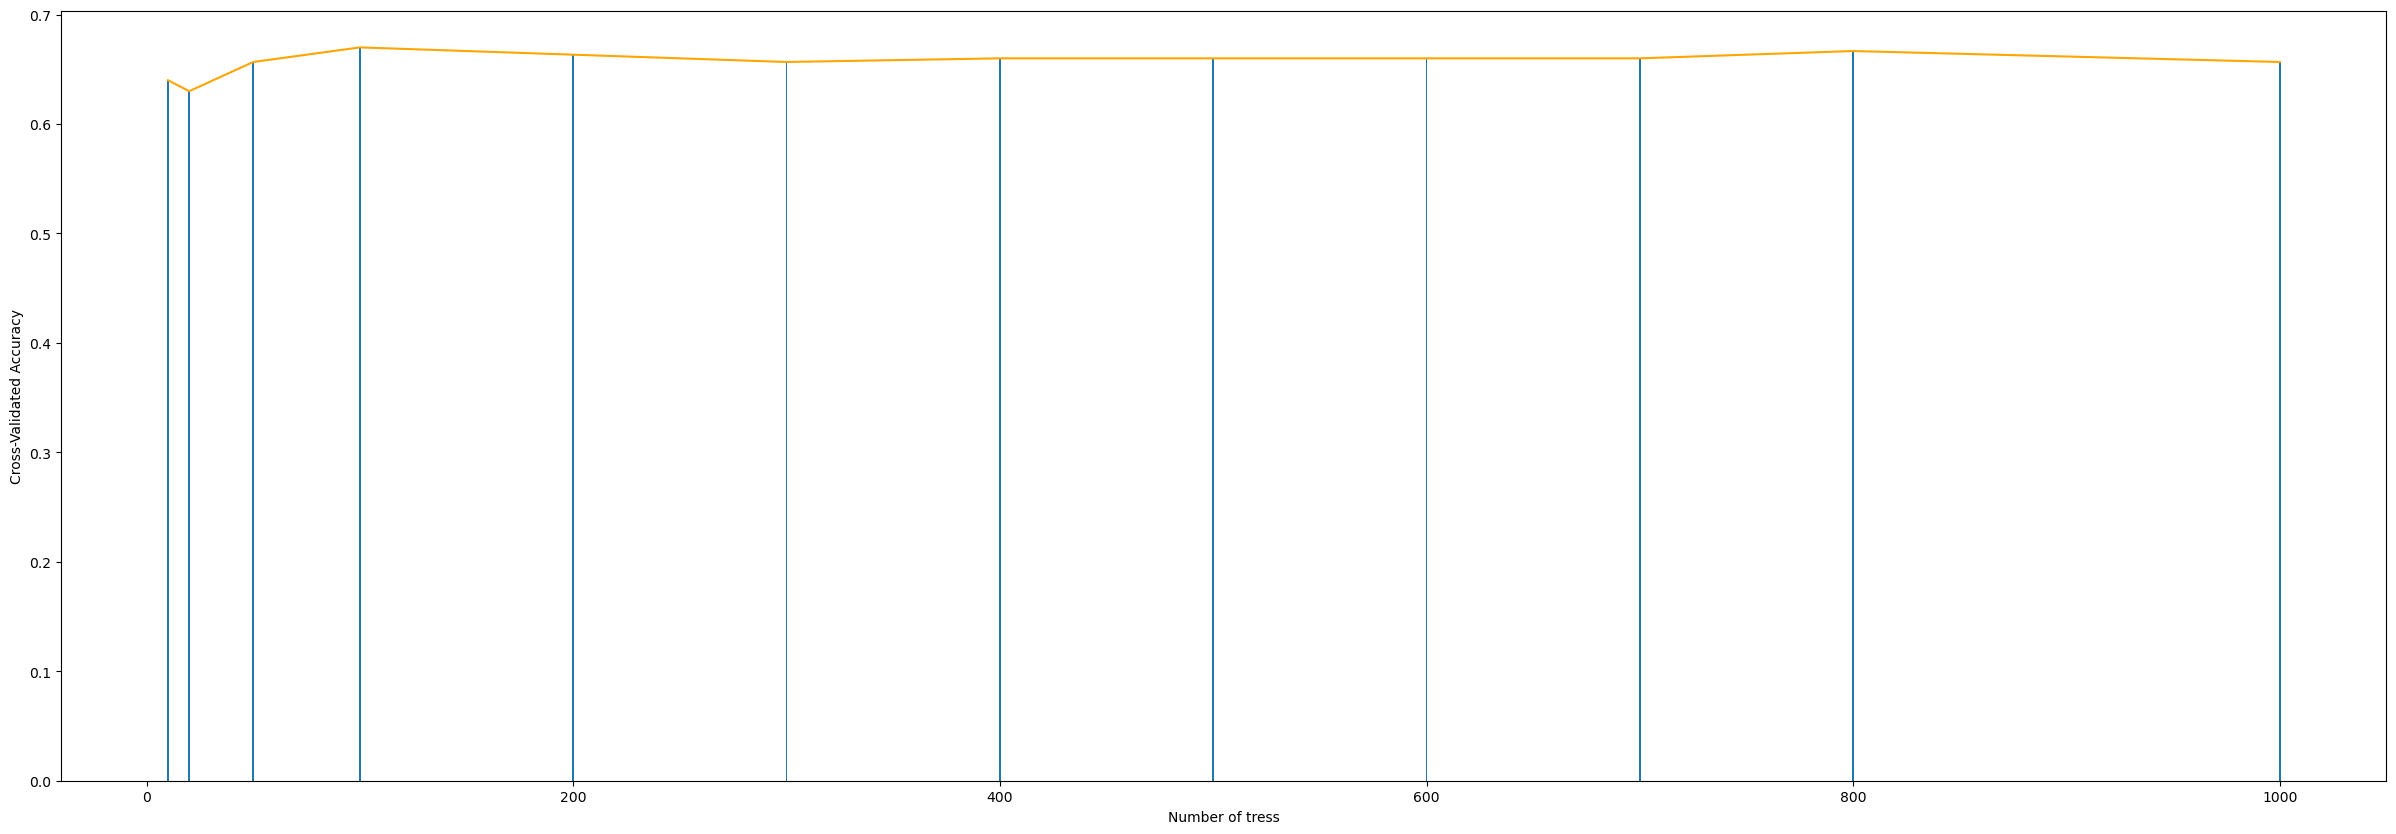

In [27]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
num_trees = [10,20,50,100,200,300,400,500,600,700,800,1000]
nf=[2,3,4,5,6]
k_scores = []




for k in num_trees:

    compdt = RandomForestClassifier(n_estimators=k)
    scores = cross_val_score(compdt, x_train, y_train, cv=10)
    k_scores.append(scores.mean())

plt.figure(figsize=(30,10))
plt.bar(num_trees, k_scores)
plt.plot(num_trees, k_scores,color="orange")

plt.xlabel('Number of tress')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# GRID SEARCH CV TO FIND BEST HYPERPARAMETER

In [28]:
from sklearn.model_selection import GridSearchCV

mod=RandomForestClassifier()
parameters={
    
    "n_estimators":[130, 140, 150, 160],
    "max_features":[4,5,6,7]
}

Grid_DT=GridSearchCV(mod,parameters,cv=9)

Grid_DT.fit(x_train,y_train)

Grid_DT.best_params_

{'max_features': 7, 'n_estimators': 140}

In [29]:
model2=RandomForestClassifier(max_features=6, n_estimators= 150)

In [30]:
model2.fit(x_train,y_train)

RandomForestClassifier(max_features=6, n_estimators=150)

In [31]:
print(classification_report(y_test,model2.predict(x_test)))

              precision    recall  f1-score   support

        High       1.00      0.30      0.46        10
         Low       0.76      0.73      0.75        30
      Medium       0.78      0.88      0.83        60

    accuracy                           0.78       100
   macro avg       0.85      0.64      0.68       100
weighted avg       0.80      0.78      0.77       100



In [32]:
model2.feature_importances_

array([0.1428823 , 0.10086434, 0.10625574, 0.09373577, 0.20968096,
       0.13775254, 0.12383031, 0.05948863, 0.011342  , 0.01416741])

# GINI INDEX WITH TREE ESTIMATORS

In [33]:
model=DecisionTreeClassifier(criterion='gini',min_samples_split=6)
model.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=6)

In [34]:
pred=Grid_DT.predict(x_test)
pd.Series(pred).value_counts()

Medium    70
Low       26
High       4
dtype: int64

In [35]:
metrics.accuracy_score(pred,y_test)

0.78

In [36]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        High       1.00      0.40      0.57        10
         Low       0.77      0.67      0.71        30
      Medium       0.77      0.90      0.83        60

    accuracy                           0.78       100
   macro avg       0.85      0.66      0.71       100
weighted avg       0.79      0.78      0.77       100



In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
print(confusion_matrix(y_test,pred))

[[ 4  0  6]
 [ 0 20 10]
 [ 0  6 54]]


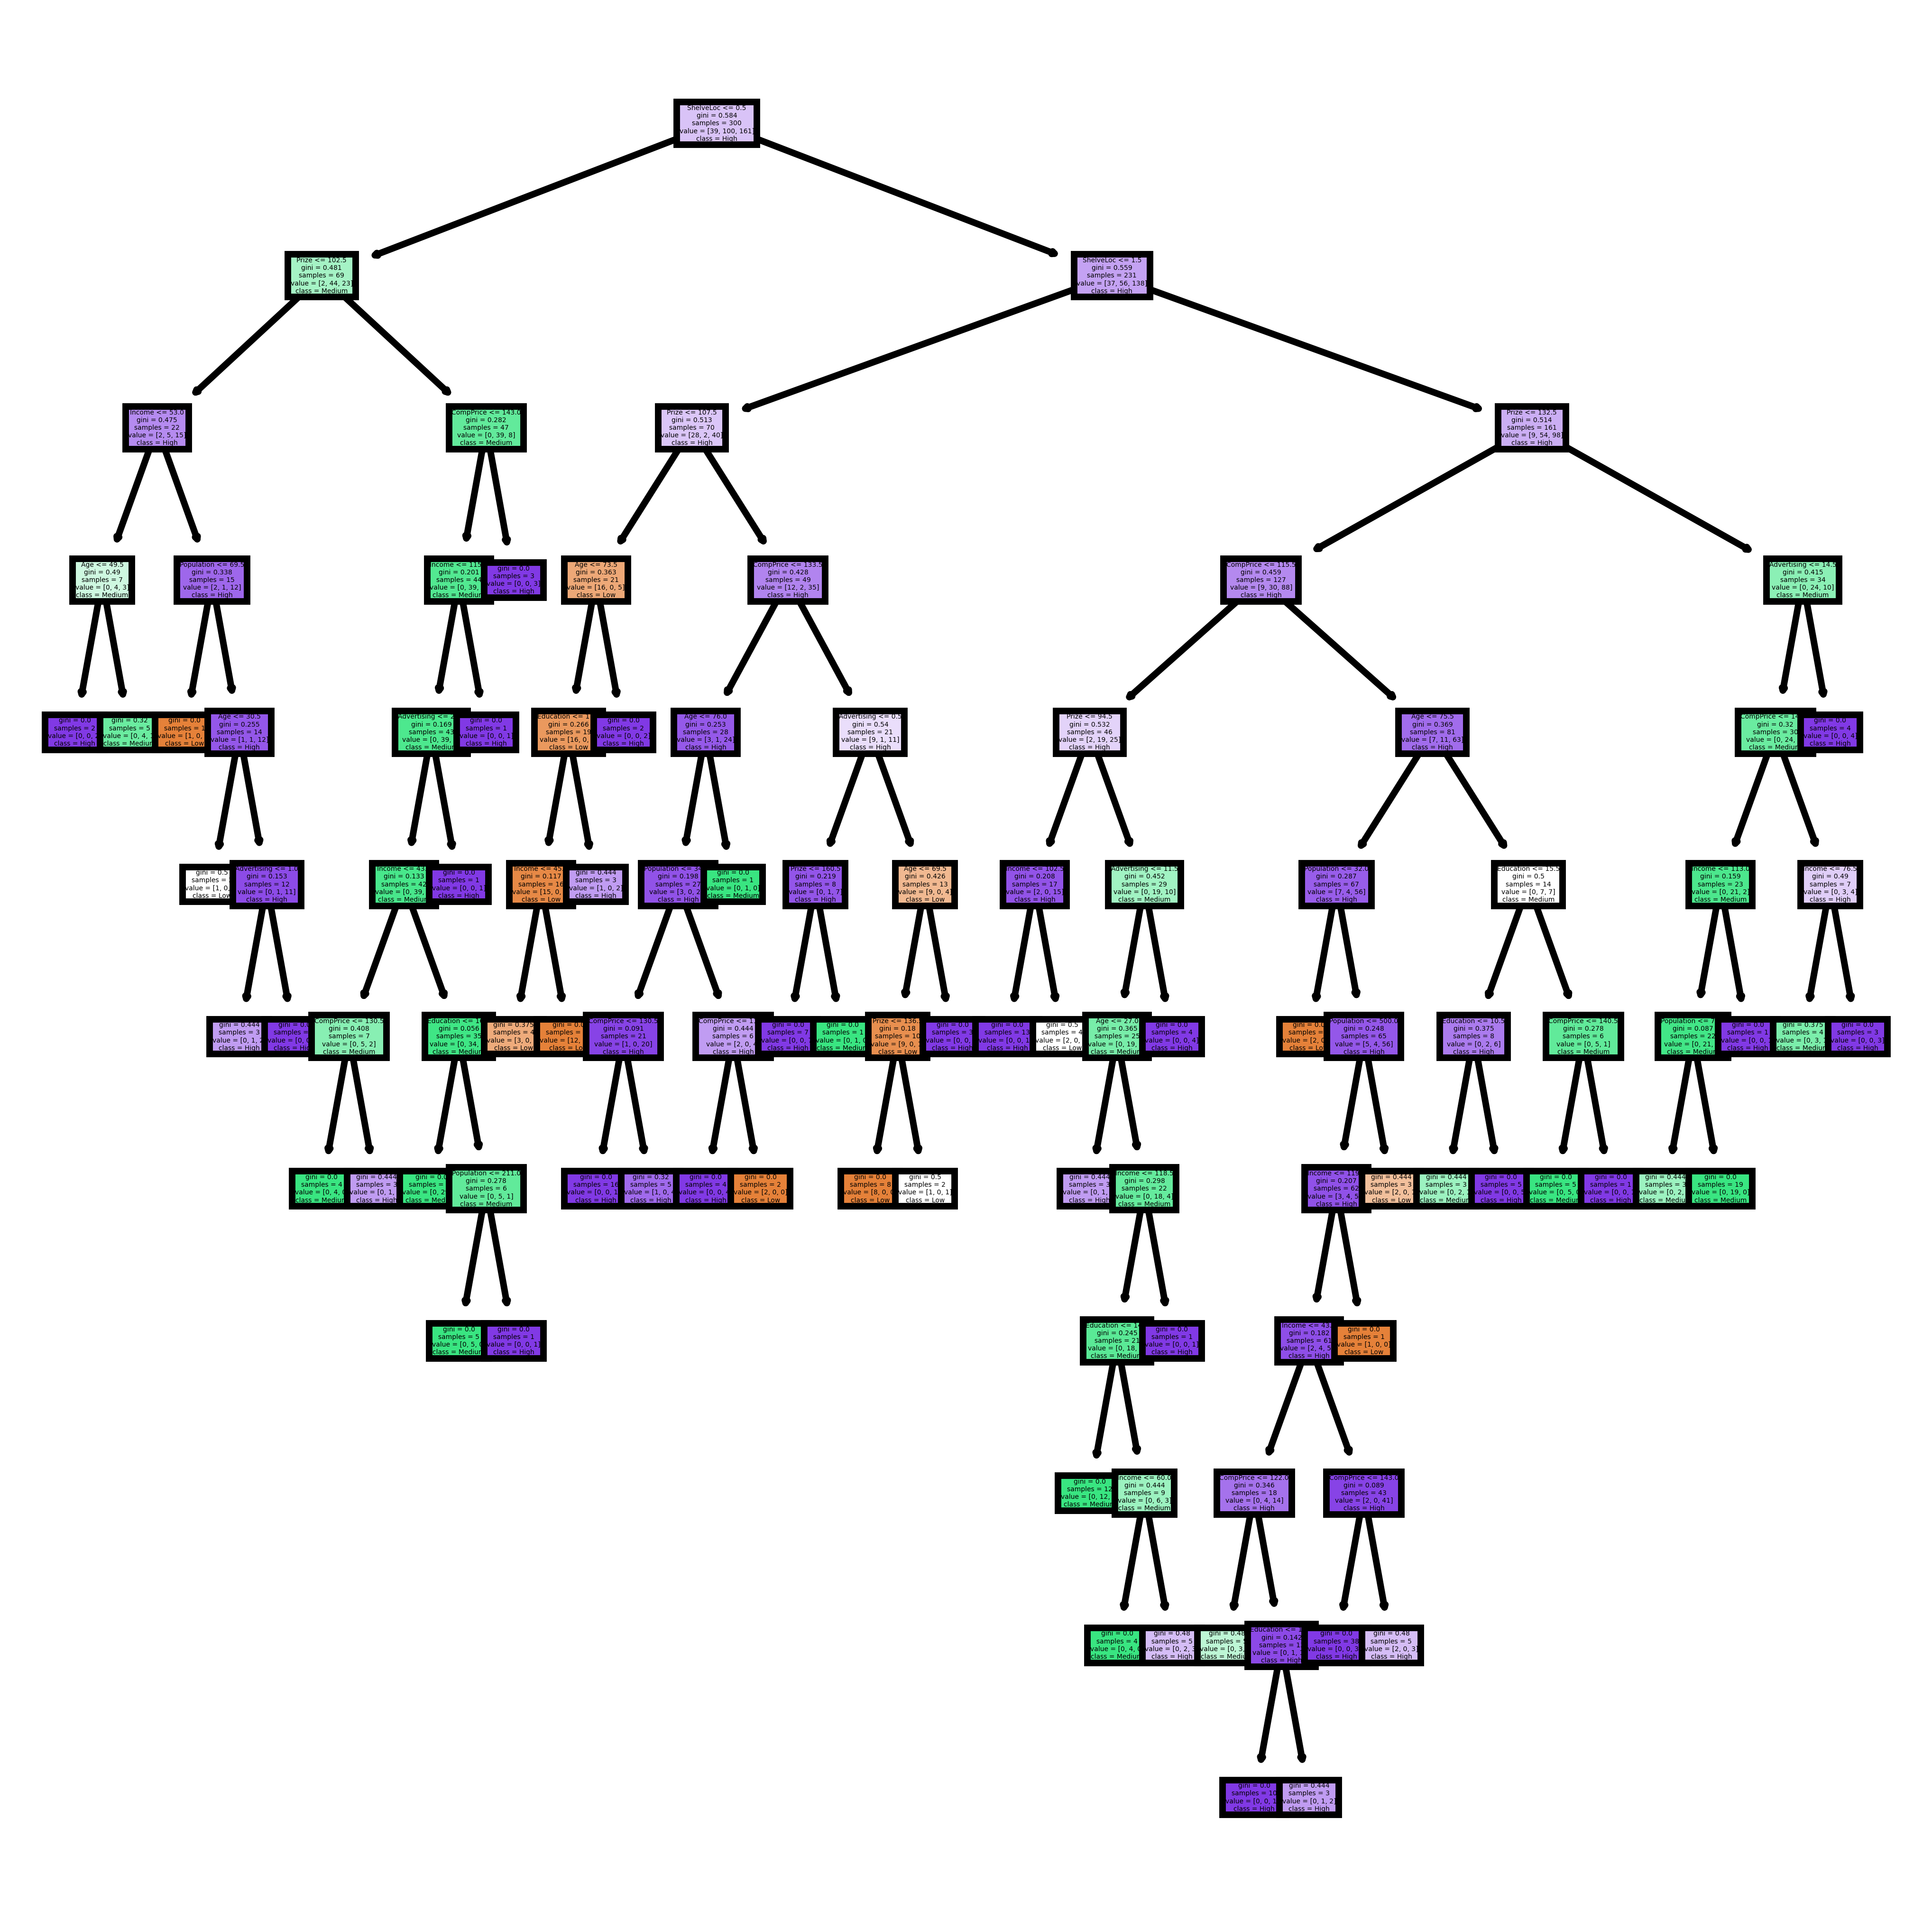

In [39]:
fe=['CompPrice','Income','Advertising','Population','Prize','ShelveLoc',
    'Age','Education','Urban','US']
ta=['Low','Medium','High']
fig,axes=plt.subplots(figsize=(5,5),dpi=1000)
tree.plot_tree(model,feature_names=fe,class_names=ta,filled= True);
plt.show()